Data fetched from Spotify:
                    SongID                        Name  \
0  5jXrULyYKHjkAMk4TXZFoG              Kaadhal Endral   
1  6veA8KjkbFRJp1NyG1hyxT  Enadhuyire (From "Bheema")   
2  3c1tJAYgROZEdqRfm7Wsny           Yedho Ondru Ennai   
3  5jOi67yXzjpMdl6KFNWSIe              Usure Pogudhey   
4  3gJbCMoDT9rUmPS1GPd6kn                    Kannamma   

                       Artist    Tempo  Danceability  Energy  
0          Yuvan Shankar Raja  129.932         0.638   0.324  
1               Nikkil Mathew  119.996         0.661   0.641  
2          Yuvan Shankar Raja  119.980         0.858   0.447  
3                 A.R. Rahman   92.997         0.674   0.663  
4  Pradeep Kumar,Dhee,Ananthu  124.895         0.585   0.271  
Data with assigned moods:
                    SongID                        Name  \
0  5jXrULyYKHjkAMk4TXZFoG              Kaadhal Endral   
1  6veA8KjkbFRJp1NyG1hyxT  Enadhuyire (From "Bheema")   
2  3c1tJAYgROZEdqRfm7Wsny           Yedho Ondru Ennai

Enter a song name for recommendations:  kanave kanave


Recommendations for 'kanave kanave':
                     SongID                                   Name  \
5   5Tu2xARdujxgjxazGYvD7n                        Ennai Kollathey   
10  2CZGdpVV9OU1TslQMvovj5                            Kadhaippoma   
12  0o2S5PKRkpTq8dLx8O7W4j   Velicha Poove (From "Ethir Neechal")   
13  5fqsWynhQRpoIVeRfRu4yQ                          Un Vizhigalil   
15  6sPW145Y3LSXd4p1LjBOcS                          Kanave Kanave   
17  3qTNm4Mta37YmEcLeQcdw3                           Oru Devathai   
18  6old0mA1IHi5lw2yLv3ri6                            Dhimu Dhimu   
20  6zdikHQs2PBFgGIZBxqOeV           Po Nee Po - The Pain of Love   
21  6dZCuf6SGn2rh9q94JBLlv                             Idhu Varai   
22  4Ndcwn2iAt1MdU6lpw24ZQ  Marappadhilai Nenje - Additional Song   
28  4LIJn3SG7mCCNKQc6vyy5S                             Yaaro Ivan   
31  7hMKAmUlUUYa5qEiHWK4bk                        Pookkal Pookkum   
32  5DYfTyqUNBmOnQtljQjYk2                                 Ayyayo

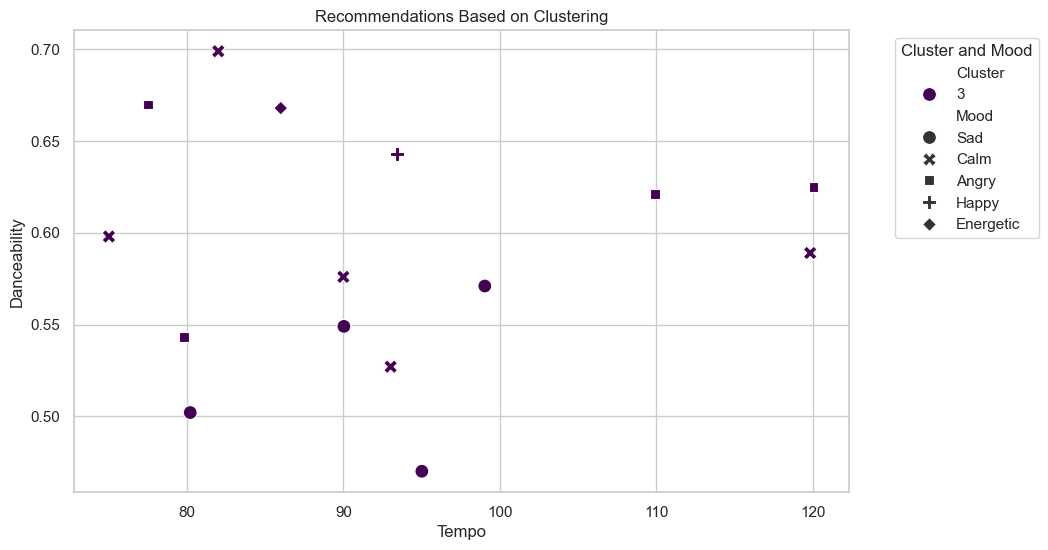

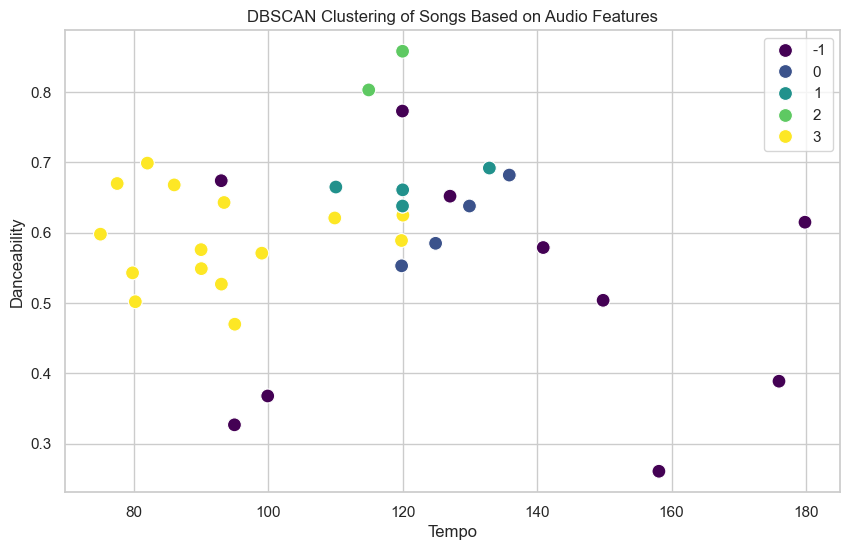

Valid DataFrame for Evaluation:
          Mood Predicted_Mood
0        Calm          Happy
1       Angry           Calm
2   Energetic      Energetic
3       Angry      Energetic
4       Angry          Happy
5         Sad           Calm
6   Energetic      Energetic
7   Energetic      Energetic
8   Energetic      Energetic
9       Angry      Energetic
10       Calm           Calm
11  Energetic      Energetic
12      Angry           Calm
13        Sad           Calm
14       Calm           Calm
15        Sad           Calm
16       Calm           Calm
17      Angry           Calm
18      Happy           Calm
19       Calm           Calm
20        Sad           Calm
21      Angry           Calm
22       Calm           Calm
23      Happy          Happy
24      Happy      Energetic
25  Energetic      Energetic
26  Energetic      Energetic
27        Sad      Energetic
28       Calm           Calm
29       Calm      Energetic
30  Energetic           Calm
31       Calm           Calm
32       C

c:\users\karth\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\users\karth\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\users\karth\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

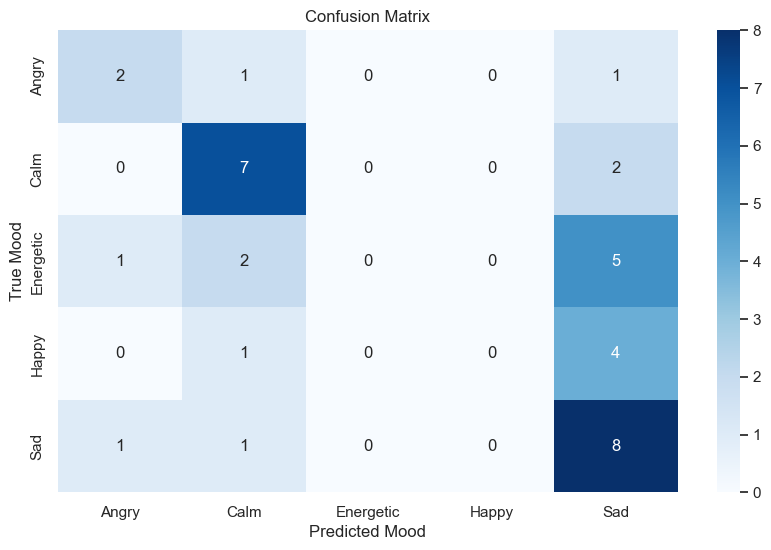

In [13]:
# Import necessary libraries
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Set up Seaborn for visualization aesthetics
sns.set(style="whitegrid")

# Step 1: Spotify Authentication
# Replace 'your_client_id' and 'your_client_secret' with your Spotify API credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id='10afa25bd536409ab818d5a6199ce3fc', 
    client_secret='ba7d499464494cecb1bcbfc2ac448a9f'
))

# Step 2: Fetch Songs from a Playlist and Get Audio Features
def get_songs_from_playlist(playlist_id, sp):
    playlist_tracks = sp.playlist_tracks(playlist_id)
    songs = []

    # Loop through each track in the playlist
    for item in playlist_tracks['items']:
        track = item['track']
        song_id = track['id']
        song_name = track['name']
        artist_name = track['artists'][0]['name']

        # Get audio features for each song
        audio_features = sp.audio_features(song_id)[0]
        if audio_features:  # Check if audio features are available
            songs.append({
                'SongID': song_id,
                'Name': song_name,
                'Artist': artist_name,
                'Tempo': audio_features['tempo'],
                'Danceability': audio_features['danceability'],
                'Energy': audio_features['energy']
            })

    return pd.DataFrame(songs)

# Example playlist ID (replace with your own or a more extensive one)
playlist_id = '4DvBrDfXIFSXaWRCRlZI4l'  # Example: "myplaylist"
df = get_songs_from_playlist(playlist_id, sp)
print("Data fetched from Spotify:\n", df.head())

# Step 3: Assign Moods (This is a manual or simulated process)
moods = ['Happy', 'Sad', 'Energetic', 'Calm', 'Angry']
np.random.seed(42)  # For reproducibility
df['Mood'] = np.random.choice(moods, size=len(df))

# Check the DataFrame to ensure moods are assigned
print("Data with assigned moods:\n", df.head())

# Step 4: Preprocess the Data
# Drop non-numeric columns for clustering
X = df[['Tempo', 'Danceability', 'Energy']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.7, min_samples=2)  # Adjust eps and min_samples as necessary
df['Cluster'] = dbscan.fit_predict(X_scaled)

# Function to Recommend Songs from the Same Cluster and return additional information for plotting
def recommend_songs(song_id, df):
    # Find the cluster of the given song
    cluster = df.loc[df['SongID'] == song_id, 'Cluster'].values[0]
    # Filter songs in the same cluster
    if cluster != -1:  # If it's not noise
        recommended_songs = df[df['Cluster'] == cluster][['SongID', 'Name', 'Artist', 'Tempo', 'Danceability', 'Energy', 'Mood', 'Cluster']]
    else:
        recommended_songs = pd.DataFrame(columns=['SongID', 'Name', 'Artist', 'Tempo', 'Danceability', 'Energy', 'Mood', 'Cluster'])
    return recommended_songs

# Function to plot recommendations
def plot_recommendations(recommendations):
    if recommendations.empty:
        print("No recommendations to plot.")
        return
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=recommendations, x='Tempo', y='Danceability', hue='Cluster', style='Mood', s=100, palette='viridis')
    plt.title('Recommendations Based on Clustering')
    plt.xlabel('Tempo')
    plt.ylabel('Danceability')
    plt.legend(title='Cluster and Mood', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

# Function to get recommendations based on song name
def get_song_recommendation(song_name, df):
    song_row = df[df['Name'].str.contains(song_name, case=False, na=False)]
    if not song_row.empty:
        song_id = song_row['SongID'].values[0]
        recommendations = recommend_songs(song_id, df)
        
        if recommendations.empty:
            print(f"No recommendations found for '{song_name}' in the same cluster.")
            cluster_id = song_row['Cluster'].values[0]
            print(f"Cluster ID for '{song_name}': {cluster_id}")

            # Check if the song is classified as noise
            if cluster_id == -1:
                print(f"'{song_name}' is classified as noise. Searching for songs by the same artist...")
                artist_name = song_row['Artist'].values[0]
                # Recommend songs by the same artist
                artist_recommendations = df[df['Artist'] == artist_name][['Name', 'Artist', 'Tempo', 'Danceability', 'Energy']]
                if not artist_recommendations.empty:
                    print(f"Songs by {artist_name}:\n", artist_recommendations)
                else:
                    print(f"No songs found by artist {artist_name}.")
        else:
            print(f"Recommendations for '{song_name}':\n", recommendations)
            plot_recommendations(recommendations)  # Plot recommendations
    else:
        print(f"Song '{song_name}' not found in the dataset.")

# Call the get_song_recommendation function with user input
song_input = input("Enter a song name for recommendations: ")
get_song_recommendation(song_input, df)
# Function to search for the song directly
def search_song(song_name):
    results = sp.search(q=song_name, type='track', limit=10)
    print(f"Searching for '{song_name}' in Spotify...")
    found = False
    for track in results['tracks']['items']:
        found = True
        print(f"{track['name']} by {', '.join(artist['name'] for artist in track['artists'])} (ID: {track['id']})")
    if not found:
        print(f"No results found for '{song_name}'.")

# Step 7: Visualize the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tempo', y='Danceability', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('DBSCAN Clustering of Songs Based on Audio Features')
plt.xlabel('Tempo')
plt.ylabel('Danceability')
plt.legend()
plt.show()

# Step 8: Evaluate Clustering Results
def evaluate_clustering(df):
    # Create a mapping of cluster labels to mood
    cluster_to_mood = {}
    for cluster in df['Cluster'].unique():
        mood_samples = df[df['Cluster'] == cluster]['Mood'].dropna().values
        if mood_samples.size > 0:
            # Assign the most common mood in the cluster
            cluster_to_mood[cluster] = pd.Series(mood_samples).mode()[0]
    
    # Map the assigned mood back to the original DataFrame
    df['Predicted_Mood'] = df['Cluster'].map(cluster_to_mood)

    # Drop rows where Mood or Predicted_Mood is NaN to avoid errors
    valid_df = df.dropna(subset=['Mood', 'Predicted_Mood'])

    if valid_df.empty:
        print("No valid data for evaluation. Please check the Mood and Predicted_Mood values.")
        return  # Exit the function if there's no valid data

    # Print the valid DataFrame for debugging
    print("Valid DataFrame for Evaluation:\n", valid_df[['Mood', 'Predicted_Mood']])

    # Create confusion matrix and classification report
    y_true = valid_df['Mood']
    y_pred = valid_df['Predicted_Mood']
    
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred, labels=list(set(y_true) | set(y_pred)))

    # Generate classification report
    class_report = classification_report(y_true, y_pred)
    print("Classification Report:\n", class_report)

    # Plot confusion matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Mood')
    plt.ylabel('True Mood')
    plt.show()

# Call the evaluation function
evaluate_clustering(df)
